In [1]:
import os
import wfdb
import pandas as pd
from concurrent.futures import ThreadPoolExecutor


In [2]:
os.chdir('..')

In [3]:
records_file_path = 'cinc-2021_data/RECORDS'

with open(records_file_path, 'r') as file:
    record_paths = file.read().splitlines()
    
def get_files(directory):
    for f in os.listdir(directory):
        if f.endswith('.hea'):
            yield directory + f[:-4]

all_files = list()
for path in record_paths:
    all_files.extend(list(get_files('cinc-2021_data/' + path)))

# Display recording dict

In [4]:
record = wfdb.rdrecord('cinc-2021_data/training/st_petersburg_incart/g1/I0007')
record.__dict__

{'record_name': 'I0007',
 'n_sig': 12,
 'fs': 257,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 462600,
 'base_time': None,
 'base_date': None,
 'comments': ['Age: 80',
  'Sex: Male',
  'Dx: 426761007,266257000,164884008',
  'Rx: Unknown',
  'Hx: Unknown',
  'Sx: Unknown'],
 'sig_name': ['I',
  'II',
  'III',
  'aVR',
  'aVL',
  'aVF',
  'V1',
  'V2',
  'V3',
  'V4',
  'V5',
  'V6'],
 'p_signal': array([[ 1.896, 13.083, 11.758, ..., -2.725,  0.583,  3.729],
        [ 1.892, 13.083, 11.763, ..., -2.725,  0.583,  3.729],
        [ 1.888, 13.083, 11.767, ..., -2.725,  0.583,  3.729],
        ...,
        [ 4.283,  6.133,  2.421, ...,  4.371,  2.733,  4.375],
        [ 4.304,  6.15 ,  2.417, ...,  4.375,  2.742,  4.379],
        [ 4.317,  6.158,  2.413, ...,  4.379,  2.738,  4.379]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['I0007.mat',
  'I0007.mat',
  'I0007.mat',
  'I0007.mat',
  'I0007.mat',
  'I0007.mat',
  'I0007.mat',
  'I0007.mat',
 

# Check values in dict

In [5]:
def extract_values(record_path):
    try:
        r = wfdb.rdrecord(record_path)
        source = record_path.split('/')[2]
        
        return r.n_sig, len(r.p_signal[0]), r.fs, r.counter_freq, r.base_counter, r.sig_len, r.base_time,\
               r.base_date, r.d_signal, r.e_p_signal, r.e_d_signal, source
    except Exception as e:
        print(f"Error processing {record_path}: {e}")
        return None, None, None, None, None, None, None, None, None, None, None, None

In [6]:
def process_values_in_records(record_paths, num_threads=10):
    with ThreadPoolExecutor(max_workers=num_threads) as executor:
        results = list(executor.map(extract_values, record_paths))

    # Convert to DataFrame
    return pd.DataFrame(results, columns=['n_sig', 'n_p_sig', 'fs', 'counter_freq', 'base_counter', 'sig_len', 'base_time',
                                          'base_date', 'd_signal', 'e_p_signal', 'e_d_signal', 'source'])

values = process_values_in_records(all_files)

In [7]:
print(f"n_sig unique values:\t\t{set(values['n_sig'])}")
print(f"fs unique values:\t\t\t{set(values['fs'])}")
print(f"counter_freq unique values:\t{set(values['counter_freq'])}")
print(f"base_counter unique values:\t{set(values['base_counter'])}")
print(f"base_time unique values:\t{set(values['base_time'])}")
print(f"base_date unique values:\t{set(values['base_date'])}")
print(f"d_signal unique values:\t\t{set(values['d_signal'])}")
print(f"e_p_signal unique values:\t{set(values['e_p_signal'])}")
print(f"e_d_signal unique values:\t{set(values['e_d_signal'])}\n")

print(f"sig_len unique value count:\t{len(set(values['sig_len']))}")

n_sig unique values:		{12}
fs unique values:			{1000, 257, 500}
counter_freq unique values:	{None}
base_counter unique values:	{None}
base_time unique values:	{None}
base_date unique values:	{None}
d_signal unique values:		{None}
e_p_signal unique values:	{None}
e_d_signal unique values:	{None}

sig_len unique value count:	1969


# Check comments

In [8]:
def extract_comments(record_path):
    try:
        r = wfdb.rdrecord(record_path)
        age, sex, dx, rx, hx, sx = None, None, None, None, None, None
        for comment in r.comments:
            if comment.startswith('Age'):
                age = comment.split(': ')[1]
            elif comment.startswith('Sex'):
                sex = comment.split(': ')[1]
            elif comment.startswith('Dx'):
                dx = comment.split(': ')[1]
            elif comment.startswith('Rx'):
                rx = comment.split(': ')[1]
            elif comment.startswith('Hx'):
                hx = comment.split(': ')[1]
            elif comment.startswith('Sx'):
                sx = comment.split(': ')[1]
        return age, sex, dx, rx, hx, sx
    except Exception as e:
        print(f"Error processing {record_path}: {e}")
        return None, None, None, None, None, None

In [9]:
def process_records(record_paths, num_threads=10):
    with ThreadPoolExecutor(max_workers=num_threads) as executor:
        results = list(executor.map(extract_comments, record_paths))

    # Convert to DataFrame
    return pd.DataFrame(results, columns=['age', 'sex', 'dx', 'rx', 'hx', 'sx'])

data = process_records(all_files)

In [10]:
print(f"age unique values:\t{set(data['age'])}")
print(f"sex unique values:\t{set(data['sex'])}")
print(f"dx unique values:\t{set(data['sex'])}")
print(f"rx unique values:\t{set(data['rx'])}")
print(f"hx unique values:\t{set(data['hx'])}")
print(f"sx unique values:\t{set(data['sx'])}")

age unique values:	{'300', '81', '75', '53', '27', '19', '92', '51', '1', '21', '40', '50', '82', '26', '77', '-1', '58', '49', '52', '45', '9', '17', '76', '10', '13', '42', '32', '68', '66', '44', '47', '14', '80', '12', '78', '57', '64', '23', '4', '31', '71', '36', '5', '86', '8', '25', '11', '34', '22', '30', '72', '65', '55', '18', '3', '24', '48', '63', '85', '2', '84', '6', '16', '41', '0', '35', '56', '73', '15', '61', '46', '20', '79', '33', '83', '29', '54', '70', '28', '62', '38', 'NaN', '39', '88', '37', '69', '74', '87', '67', '43', '7', '60', '89', '59'}
sex unique values:	{'Male', 'NaN', 'Female', 'Unknown'}
dx unique values:	{'Male', 'NaN', 'Female', 'Unknown'}
rx unique values:	{'Unknown'}
hx unique values:	{'Unknown', None}
sx unique values:	{'Unknown', None}


# Check array

In [11]:
def extract_array(record_path):
    try:
        r = wfdb.rdrecord(record_path)
        sig_name = set(r.sig_name)
        file_name = set(r.file_name)
        fmt = set(r.fmt)
        samps_per_frame = set(r.samps_per_frame)
        skew = set(r.skew)
        byte_offset = set(r.byte_offset)
        adc_gain = set(r.adc_gain)
        baseline = set(r.baseline)
        units = set(r.units)
        adc_res = set(r.adc_res)
        adc_zero = set(r.adc_zero)
        block_size = set(r.block_size)
        return sig_name, file_name, fmt, samps_per_frame, skew, byte_offset, adc_gain, baseline, units, adc_res, adc_zero, block_size
    except Exception as e:
        print(f"Error processing {record_path}: {e}")
        return None, None, None, None, None, None, None, None, None, None, None, None

In [12]:
def process_arrays_in_records(record_paths, num_threads=10):
    with ThreadPoolExecutor(max_workers=num_threads) as executor:
        results = list(executor.map(extract_array, record_paths))

    # Convert to DataFrame
    return pd.DataFrame(results,
                        columns=['sig_name', 'file_name', 'fmt', 'samps_per_frame', 'skew', 'byte_offset', 'adc_gain', 'baseline', 'units', 'adc_res', 'adc_zero', 'block_size'])


arr = process_arrays_in_records(all_files)


In [13]:
print(f"sig_name unique values:\t{set(arr['sig_name'].apply(lambda x: ', '.join(map(str, x))))}")
print(f"file_name unique values:\t{len(set(arr['file_name'].apply(lambda x: ', '.join(map(str, x)))))}")
print(f"fmt unique values:\t{set(arr['fmt'].apply(lambda x: ', '.join(map(str, x))))}")
print(f"samps_per_frame unique values:\t{set(arr['samps_per_frame'].apply(lambda x: ', '.join(map(str, x))))}")
print(f"skew unique values:\t{set(arr['skew'].apply(lambda x: ', '.join(map(str, x))))}")
print(f"byte_offset unique values:\t{set(arr['byte_offset'].apply(lambda x: ', '.join(map(str, x))))}")
print(f"adc_gain unique values:\t{set(arr['adc_gain'].apply(lambda x: ', '.join(map(str, x))))}")
print(f"baseline unique values:\t{set(arr['baseline'].apply(lambda x: ', '.join(map(str, x))))}")
print(f"units unique values:\t{set(arr['units'].apply(lambda x: ', '.join(map(str, x))))}")
print(f"adc_res unique values:\t{set(arr['adc_res'].apply(lambda x: ', '.join(map(str, x))))}")
print(f"adc_zero unique values:\t{set(arr['adc_zero'].apply(lambda x: ', '.join(map(str, x))))}")
print(f"block_size unique values:\t{set(arr['block_size'].apply(lambda x: ', '.join(map(str, x))))}")

sig_name unique values:	{'III, V2, V1, V4, aVF, V3, aVR, I, V5, II, V6, aVL'}
file_name unique values:	88252
fmt unique values:	{'16'}
samps_per_frame unique values:	{'1'}
skew unique values:	{'None'}
byte_offset unique values:	{'24'}
adc_gain unique values:	{'1000.0'}
baseline unique values:	{'0'}
units unique values:	{'mV', 'mv'}
adc_res unique values:	{'16'}
adc_zero unique values:	{'0'}
block_size unique values:	{'0'}


# Data Source distribution

In [14]:
import matplotlib.pyplot as plt
import numpy as np

In [15]:
data = process_values_in_records(all_files)

In [16]:
print(f"total data: {len(data)}")
data.groupby('source')['fs'].value_counts()

total data: 88252


source                fs  
chapman_shaoxing      500     10247
cpsc_2018             500      6877
cpsc_2018_extra       500      3453
georgia               500     10344
ningbo                500     34904
ptb                   1000      516
ptb-xl                500     21837
st_petersburg_incart  257        74
Name: count, dtype: int64

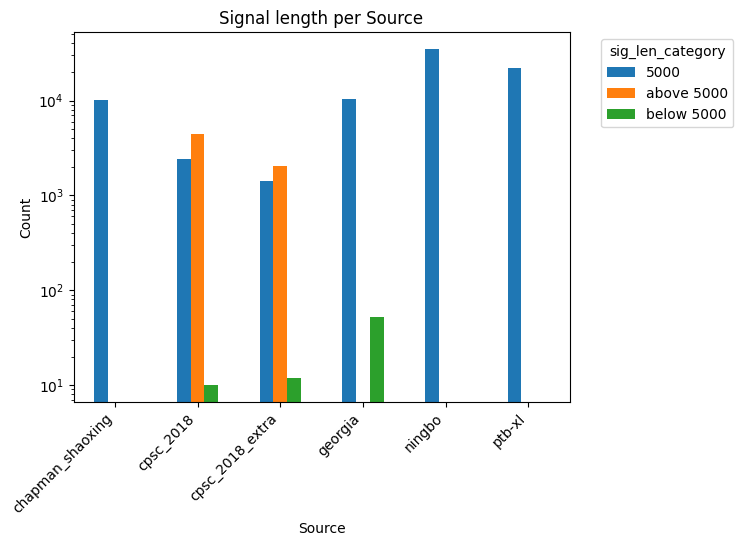

In [17]:
new_data = data.loc[data['source'] != 'ptb']
new_data = new_data.loc[data['source'] != 'st_petersburg_incart']
def categorize_sig_len(x):
    if x < 5000:
        return 'below 5000'
    elif x == 5000:
        return '5000'
    else:
        return 'above 5000'

new_data['sig_len_category'] = data['sig_len'].apply(categorize_sig_len)

value_counts_per_source = new_data.groupby(['source', 'sig_len_category']).size().unstack().fillna(0)

# Plotting
value_counts_per_source.plot(kind='bar', stacked=False)
plt.legend(title='sig_len_category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Signal length per Source')
plt.xlabel('Source')
plt.ylabel('Count')
plt.yscale('log')

plt.xticks(rotation=45, ha='right')
plt.show()

In [18]:
value_counts_per_source

sig_len_category,5000,above 5000,below 5000
source,,,
chapman_shaoxing,10247.0,0.0,0.0
cpsc_2018,2416.0,4451.0,10.0
cpsc_2018_extra,1403.0,2038.0,12.0
georgia,10292.0,0.0,52.0
ningbo,34904.0,0.0,0.0
ptb-xl,21837.0,0.0,0.0


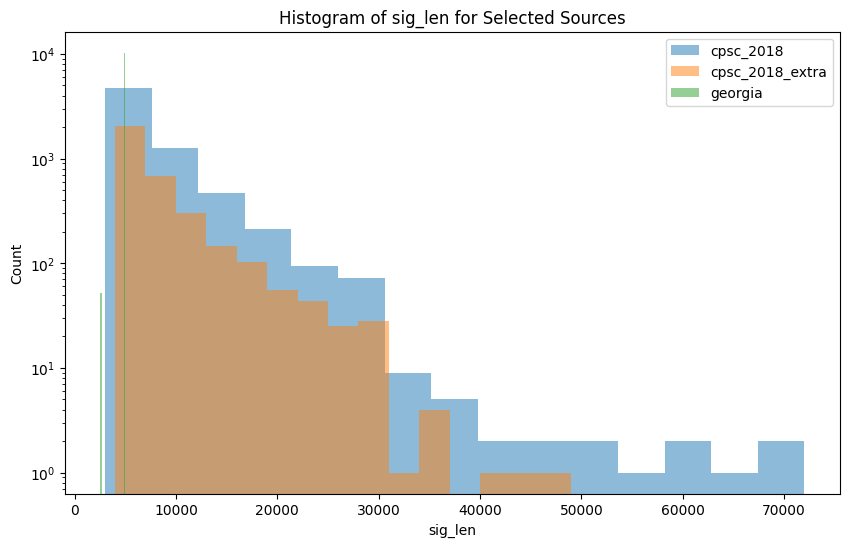

In [19]:
# Filter the DataFrame to include only the specified sources
filtered_df = data[data['source'].isin(['cpsc_2018', 'cpsc_2018_extra', 'georgia'])]

# Plotting a histogram for the specified sources
plt.figure(figsize=(10, 6))
for source in filtered_df['source'].unique():
    # Select the sig_len for the current source
    subset = filtered_df[filtered_df['source'] == source]['sig_len']
    plt.hist(subset, bins=15, alpha=0.5, label=source)

plt.title('Histogram of sig_len for Selected Sources')
plt.xlabel('sig_len')
plt.ylabel('Count')
plt.yscale('log')
plt.legend()
plt.show()